# **G2M Insight for Cab Investment Firm**

---



In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro, levene
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive')

# **Load Data**

In [ ]:
cab_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-Glacier-Internship/Week 2/Cab_Data.csv")
city_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-Glacier-Internship/Week 2/City.csv")
customer_id = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-Glacier-Internship/Week 2/Customer_ID.csv")
transaction_id = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-Glacier-Internship/Week 2/Transaction_ID.csv")
holidays = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-Glacier-Internship/Week 2/holidays.csv")


# **Merge Data into a DataFrame**

In [4]:
# Merge the DataFrames using pandas
df = pd.merge(cab_data, transaction_id, on= 'Transaction ID')
df = pd.merge(df, customer_id, on='Customer ID')
# Convert Date of Travel to datetime format
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
holidays['date'] = pd.to_datetime(holidays['date'])

# Create a new column 'Is Holiday' and assign 'Yes' if the date is in holidays DataFrame
df['Is Holiday'] = np.where(df['Date of Travel'].isin(holidays['date']), 'Yes', 'No')

# Create new column 'Profit on Trip'
df['Profit on Trip'] = df['Price Charged'] - df['Cost of Trip']

# **Data Cleaning and Preprocessing**

In [5]:
print(df.duplicated(subset=['Transaction ID', 'Customer ID']).sum(), 'Duplicates')
print(df.isnull().sum().sum(), 'Missing Values',)

# Drop irrelevant columns
df.drop(['Transaction ID', 'Customer ID'], axis=1, inplace=True)

0 Duplicates
0 Missing Values


In [6]:
# Define age group bins and labels
bins = [18, 25, 35, 45, 55, 65, np.inf]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Create a new column 'Age_Group'
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Define Income Range bins and labels
bins = [2000, 5000, 10000, 20000, 30000, np.inf]
labels = ['2-5k', '6-10k', '11-20k', '21-30k', '31-40k']

# Create a new column 'Income Range'
df['Income_Range'] = pd.cut(df['Income (USD/Month)'], bins=bins, labels=labels, include_lowest=True)

# Extract Year
df['Year'] = df['Year'].astype(str)

# Extract Month
df['Month'] = df['Date of Travel'].dt.month_name()

# Extract Day
df['Day'] = df['Date of Travel'].dt.day

# Extract Day of the Week
df['Day_of_Week'] = df['Date of Travel'].dt.day_name()

# Convert Day column to string format
df['Day'] = df['Day'].astype(str)

df = df.sort_values('Date of Travel', ascending=True)

# Calculate profit per kilometer
df['Profit per KM'] = df['Profit on Trip'] / df['KM Travelled']



# **Understanding the Dataset**

In [7]:
print(df.info())
print(df.loc[df['Company'] == 'Yellow Cab'].describe())
print(df.loc[df['Company'] == 'Pink Cab'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323410 entries, 9006 to 294525
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date of Travel      323410 non-null  datetime64[ns]
 1   MonthYear           323410 non-null  object        
 2   Year                323410 non-null  object        
 3   Company             323410 non-null  object        
 4   City                323410 non-null  object        
 5   KM Travelled        323410 non-null  float64       
 6   Price Charged       323410 non-null  float64       
 7   Cost of Trip        323410 non-null  float64       
 8   Payment_Mode        323410 non-null  object        
 9   Gender              323410 non-null  object        
 10  Age                 323410 non-null  int64         
 11  Income (USD/Month)  323410 non-null  int64         
 12  Is Holiday          323410 non-null  object        
 13  Profit on Trip      323410

# **Univariate Analysis**

## Distribution of Numerical Columns

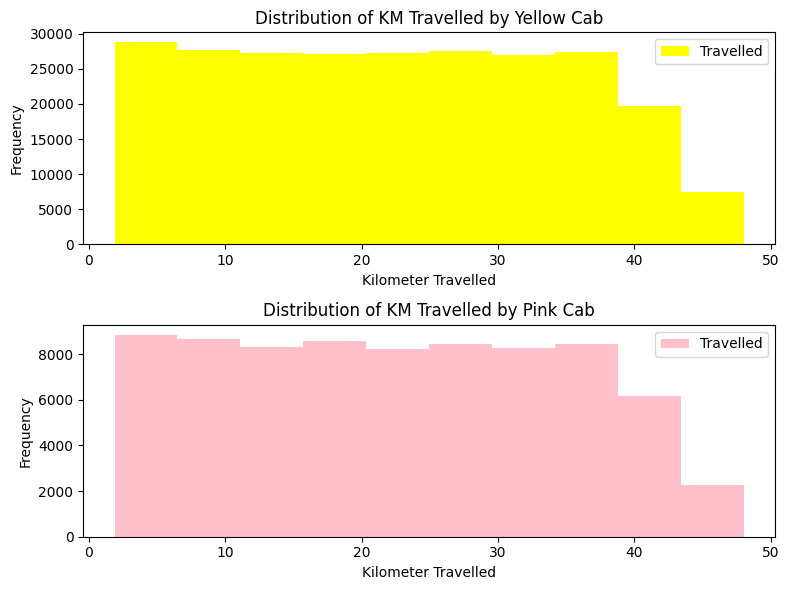

In [17]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot histogram for 'Yellow Cab'
ax1.hist(df[df['Company'] == 'Yellow Cab']['KM Travelled'], bins=10, color='yellow', label='Travelled')
ax1.set_xlabel('Kilometer Travelled')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of KM Travelled by Yellow Cab')
ax1.legend()

# Plot histogram for 'Pink Cab'
ax2.hist(df[df['Company'] == 'Pink Cab']['KM Travelled'], bins=10, color='pink', label='Travelled')
ax2.set_xlabel('Kilometer Travelled')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of KM Travelled by Pink Cab')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

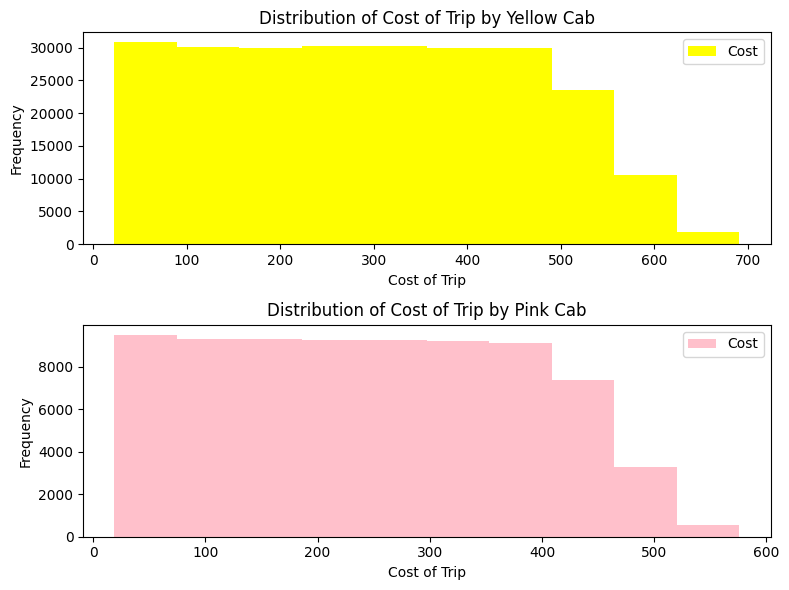

In [18]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot histogram for 'Yellow Cab'
ax1.hist(df[df['Company'] == 'Yellow Cab']['Cost of Trip'], bins=10, color='yellow', label='Cost')
ax1.set_xlabel('Cost of Trip')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Cost of Trip by Yellow Cab')
ax1.legend()

# Plot histogram for 'Pink Cab'
ax2.hist(df[df['Company'] == 'Pink Cab']['Cost of Trip'], bins=10, color='pink', label='Cost')
ax2.set_xlabel('Cost of Trip')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Cost of Trip by Pink Cab')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

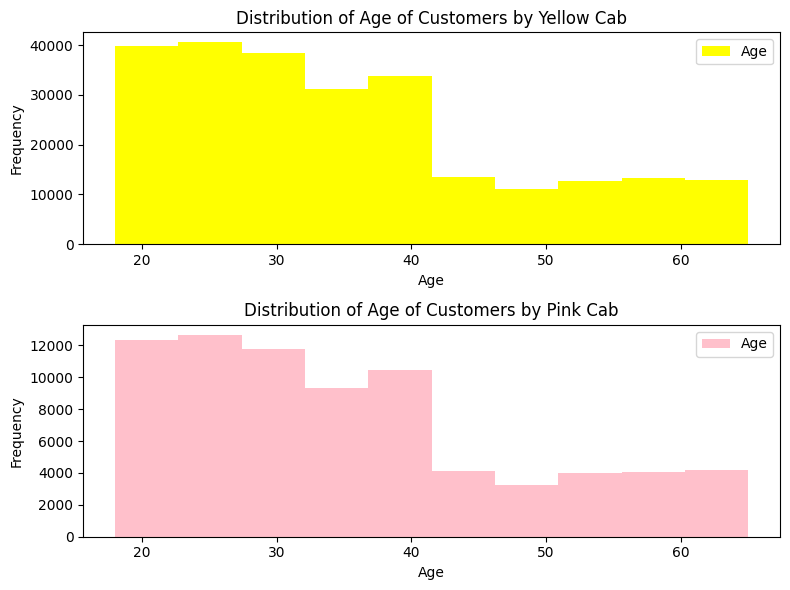

In [19]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot histogram for 'Yellow Cab'
ax1.hist(df[df['Company'] == 'Yellow Cab']['Age'], bins=10, color='yellow', label='Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Age of Customers by Yellow Cab')
ax1.legend()

# Plot histogram for 'Pink Cab'
ax2.hist(df[df['Company'] == 'Pink Cab']['Age'], bins=10, color='pink', label='Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Age of Customers by Pink Cab')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

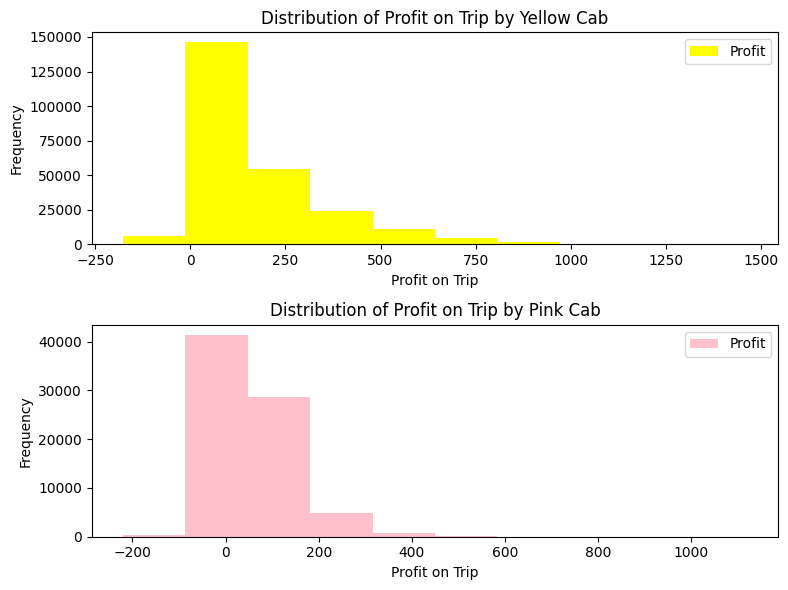

In [20]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot histogram for 'Yellow Cab'
ax1.hist(df[df['Company'] == 'Yellow Cab']['Profit on Trip'], bins=10, color='yellow', label='Profit')
ax1.set_xlabel('Profit on Trip')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Profit on Trip by Yellow Cab')
ax1.legend()

# Plot histogram for 'Pink Cab'
ax2.hist(df[df['Company'] == 'Pink Cab']['Profit on Trip'], bins=10, color='pink', label='Profit')
ax2.set_xlabel('Profit on Trip')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Profit on Trip by Pink Cab')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

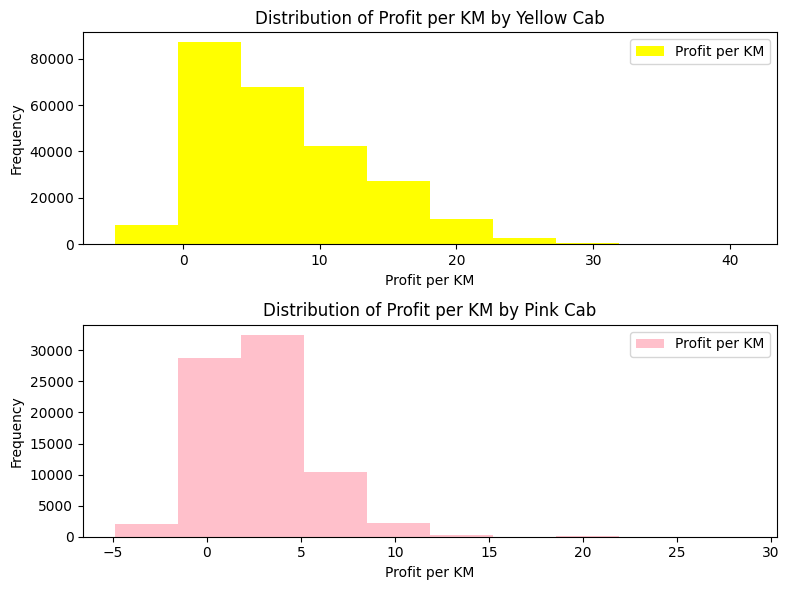

In [21]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot histogram for 'Yellow Cab'
ax1.hist(df[df['Company'] == 'Yellow Cab']['Profit per KM'], bins=10, color='yellow', label='Profit per KM')
ax1.set_xlabel('Profit per KM')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Profit per KM by Yellow Cab')
ax1.legend()

# Plot histogram for 'Pink Cab'
ax2.hist(df[df['Company'] == 'Pink Cab']['Profit per KM'], bins=10, color='pink', label='Profit per KM')
ax2.set_xlabel('Profit per KM')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Profit per KM by Pink Cab')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

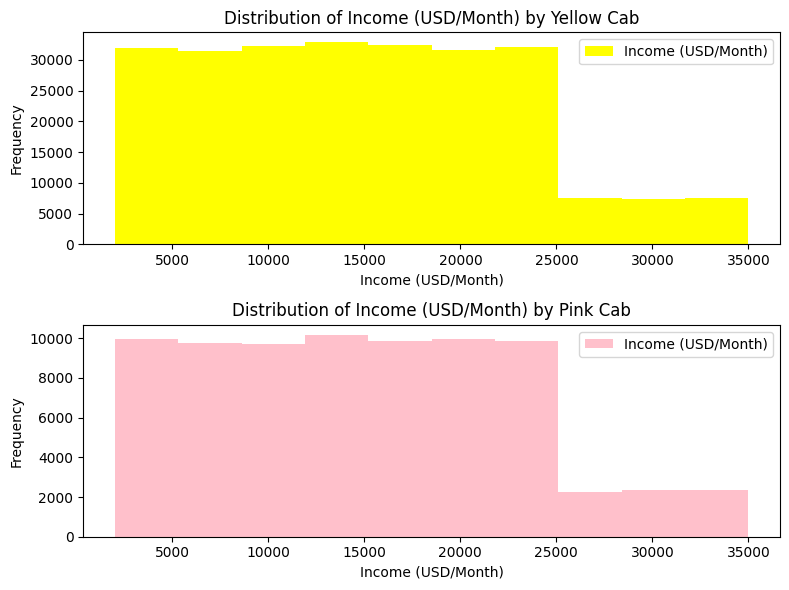

In [22]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot histogram for 'Yellow Cab'
ax1.hist(df[df['Company'] == 'Yellow Cab']['Income (USD/Month)'], bins=10, color='yellow', label='Income (USD/Month)')
ax1.set_xlabel('Income (USD/Month)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Income (USD/Month) by Yellow Cab')
ax1.legend()

# Plot histogram for 'Pink Cab'
ax2.hist(df[df['Company'] == 'Pink Cab']['Income (USD/Month)'], bins=10, color='pink', label='Income (USD/Month)')
ax2.set_xlabel('Income (USD/Month)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Income (USD/Month) by Pink Cab')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Companies' Performance by Key Performing Index

### Kilometer Travelled

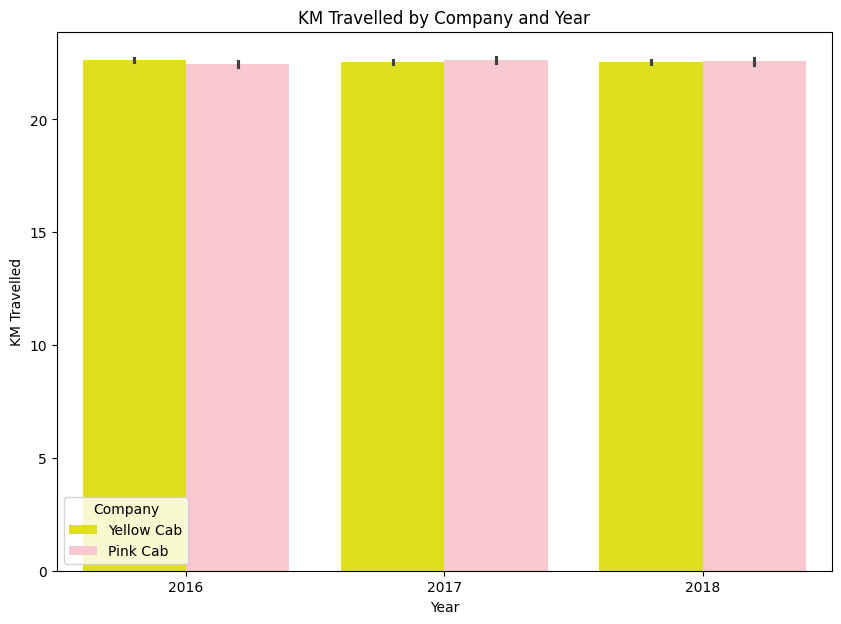

In [27]:
# Bar chart for KM by Company and Year
plt.figure(figsize=(10, 7))


# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Year', y='KM Travelled', hue='Company', data=df)

# Add title
plt.title('KM Travelled by Company and Year')

# Show plot
plt.show()

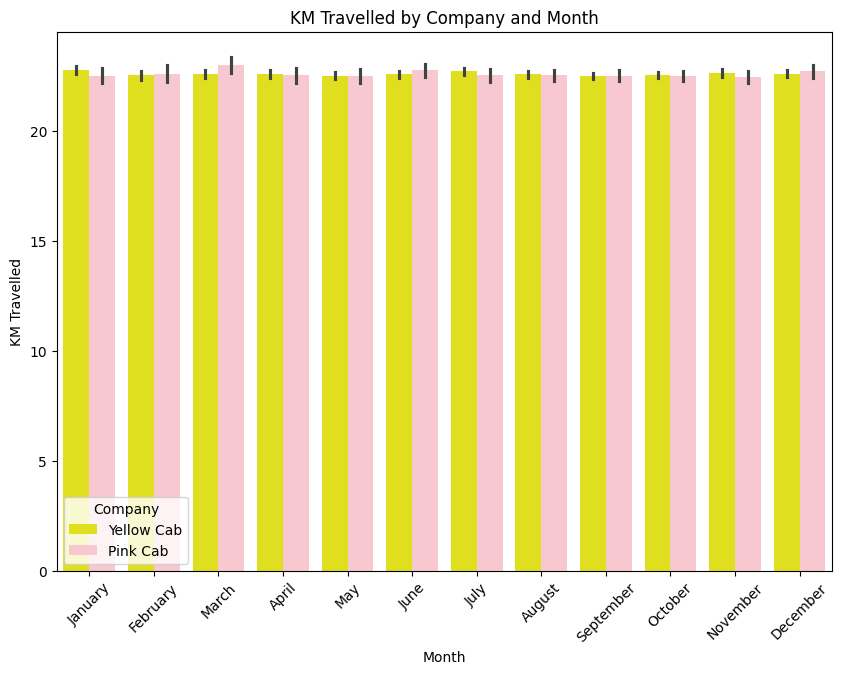

In [29]:
# Bar chart for KM by Company and Month
plt.figure(figsize=(10, 7))
# Rotate x-axis labels
plt.xticks(rotation=45)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Month', y='KM Travelled', hue='Company', data=df)

# Add title
plt.title('KM Travelled by Company and Month')

# Show plot
plt.show()

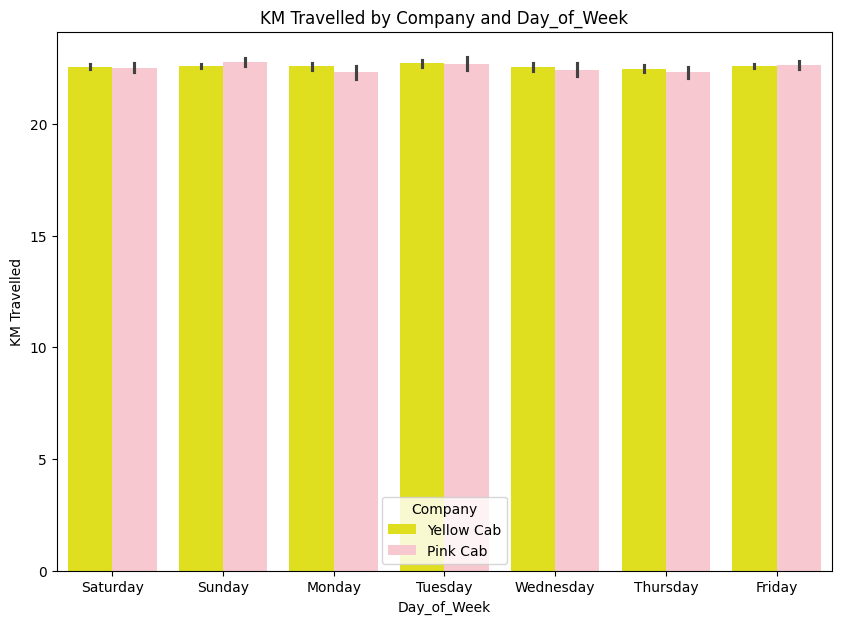

In [31]:
# Bar chart for KM by Company and Day of the Week
plt.figure(figsize=(10, 7))

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day_of_Week', y='KM Travelled', hue='Company', data=df)

# Add title
plt.title('KM Travelled by Company and Day_of_Week')

# Show plot
plt.show()

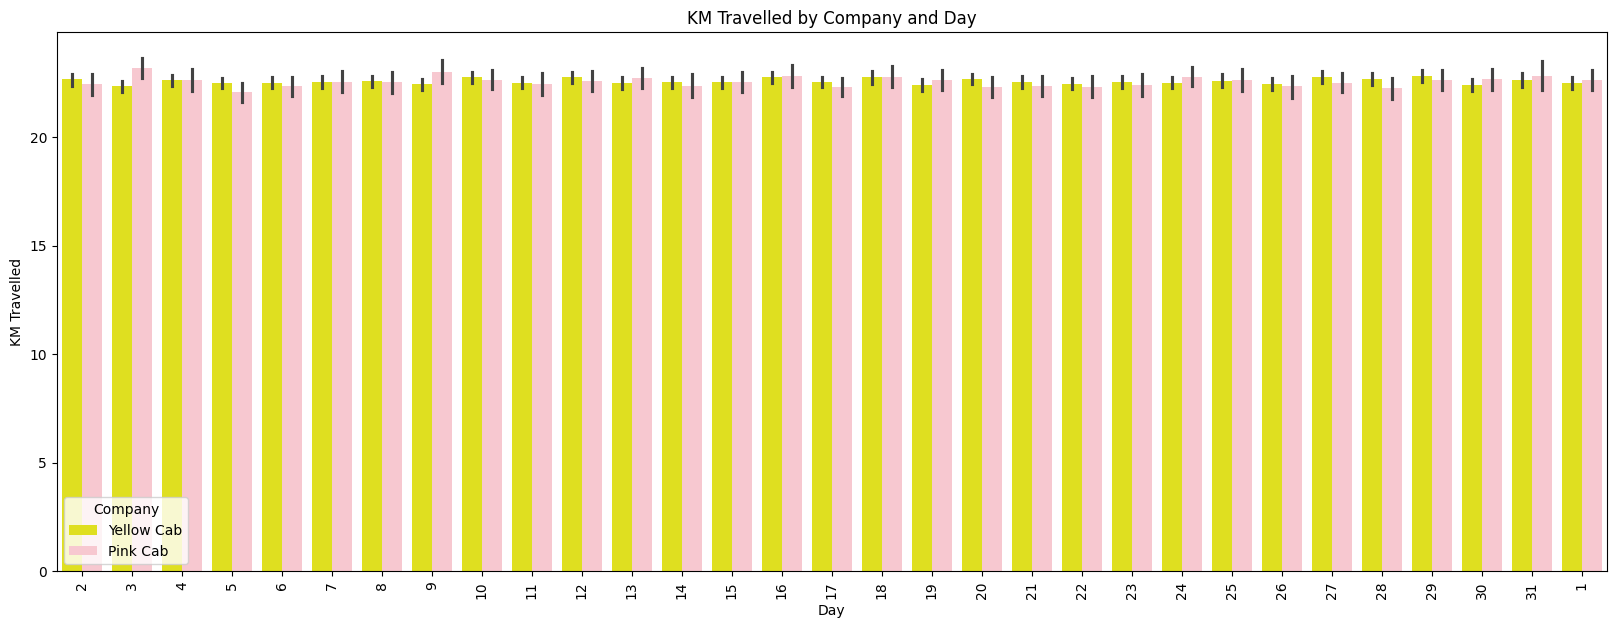

In [33]:
# Bar chart for KM by Company and Day
plt.figure(figsize=(20, 7))
# Rotate x-axis labels
plt.xticks(rotation=90)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day', y='KM Travelled', hue='Company', data=df)

# Add title
plt.title('KM Travelled by Company and Day')

# Show plot
plt.show()

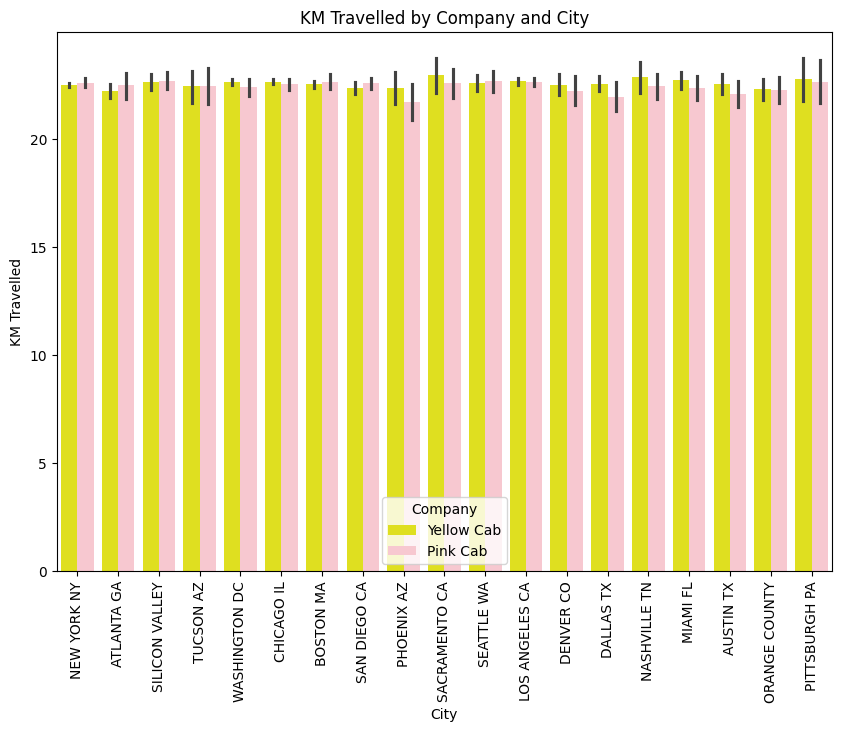

In [34]:
# Bar chart for KM by Company and City
plt.figure(figsize=(10, 7))
# Rotate x-axis labels
plt.xticks(rotation=90)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='City', y='KM Travelled', hue='Company', data=df)

# Add title
plt.title('KM Travelled by Company and City')

# Show plot
plt.show()

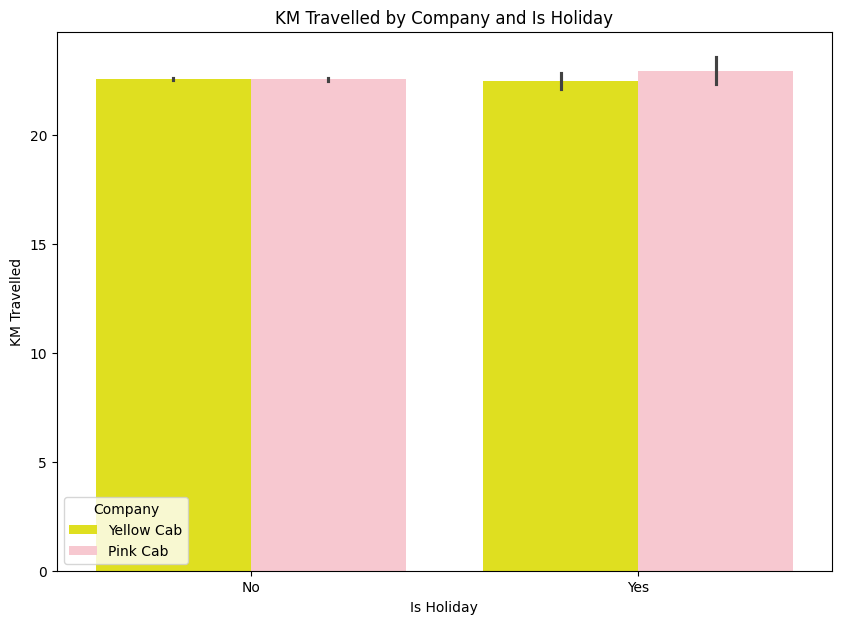

In [36]:
# Bar chart for KM by Company and Is Holiday
plt.figure(figsize=(10, 7))

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Is Holiday', y='KM Travelled', hue='Company', data=df)

# Add title
plt.title('KM Travelled by Company and Is Holiday')

# Show plot
plt.show()

### Profit per Kilometer

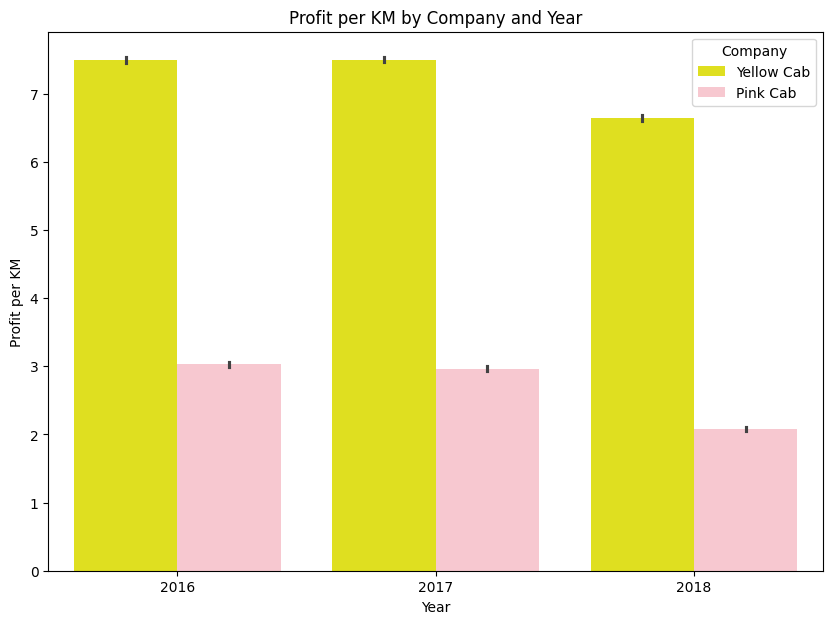

In [37]:
# Bar chart for Profit per Kilometer by Company and Year
plt.figure(figsize=(10, 7))

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Year', y='Profit per KM', hue='Company', data=df)

# Add title
plt.title('Profit per KM by Company and Year')

# Show plot
plt.show()

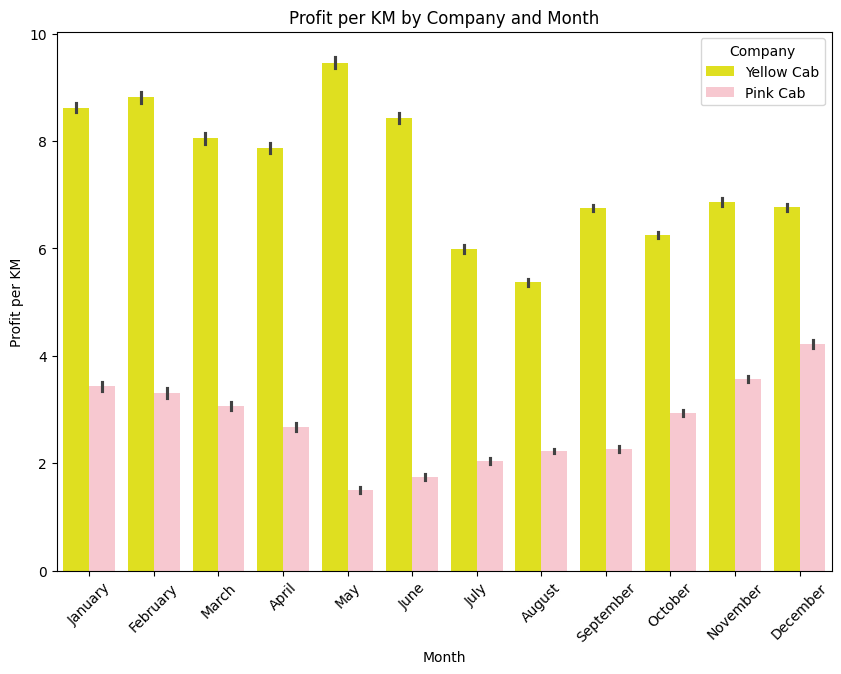

In [40]:
# Bar chart for Profit per Kilometer by Company and Month
plt.figure(figsize=(10, 7))
# Rotate x-axis labels
plt.xticks(rotation=45)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Month', y='Profit per KM', hue='Company', data=df)

# Add title
plt.title('Profit per KM by Company and Month')

# Show plot
plt.show()

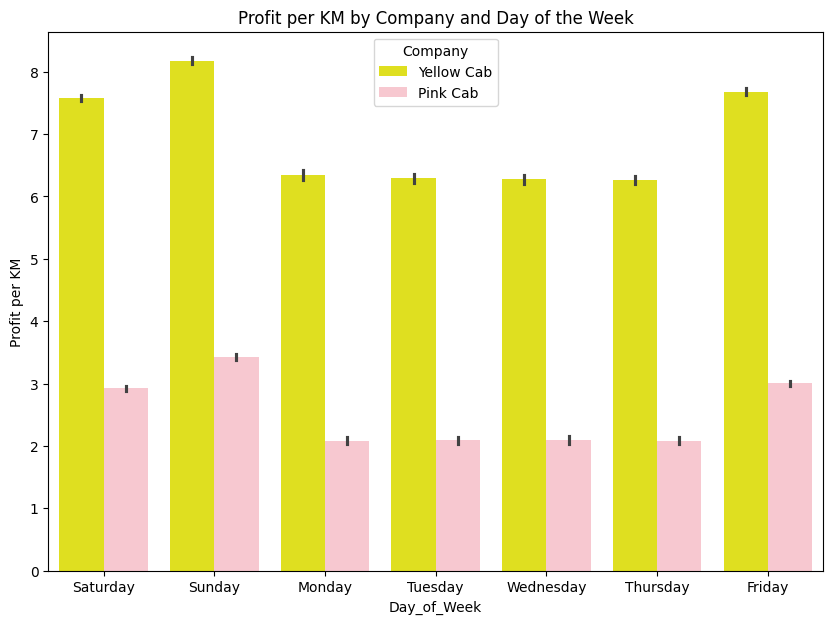

In [42]:
# Bar chart for Profit per Kilometer by Company and Day of the Week
plt.figure(figsize=(10, 7))


# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day_of_Week', y='Profit per KM', hue='Company', data=df)

# Add title
plt.title('Profit per KM by Company and Day of the Week')

# Show plot
plt.show()

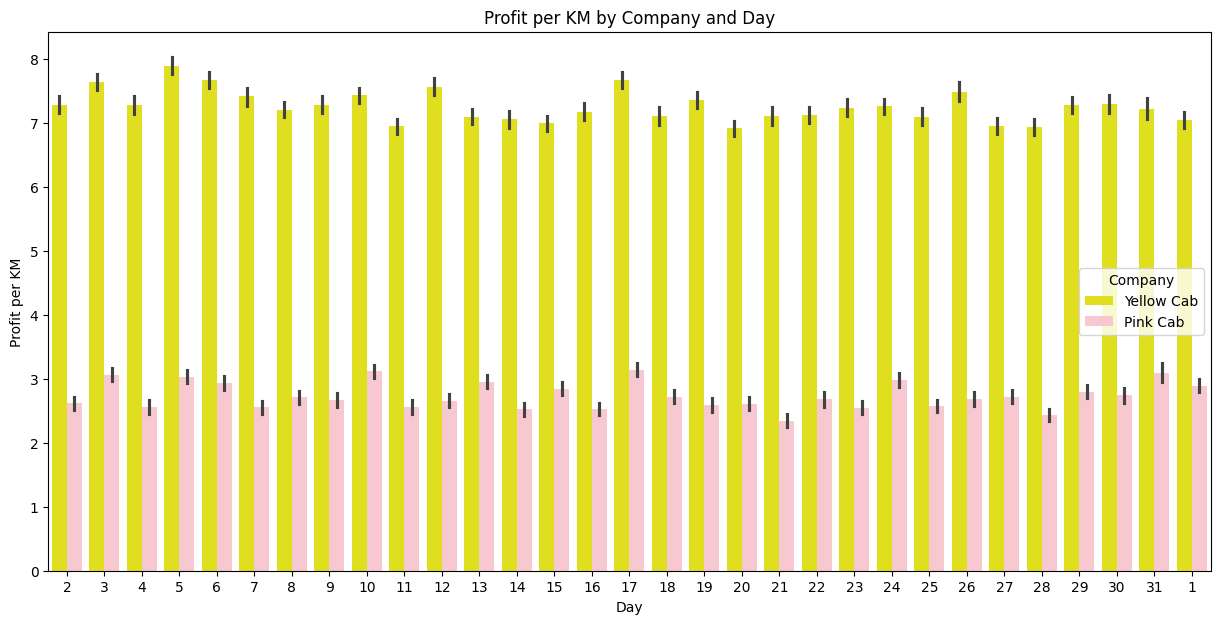

In [45]:
# Bar chart for Profit per Kilometer by Company and Day
plt.figure(figsize=(15, 7))

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day', y='Profit per KM', hue='Company', data=df)

# Add title
plt.title('Profit per KM by Company and Day')

# Show plot
plt.show()

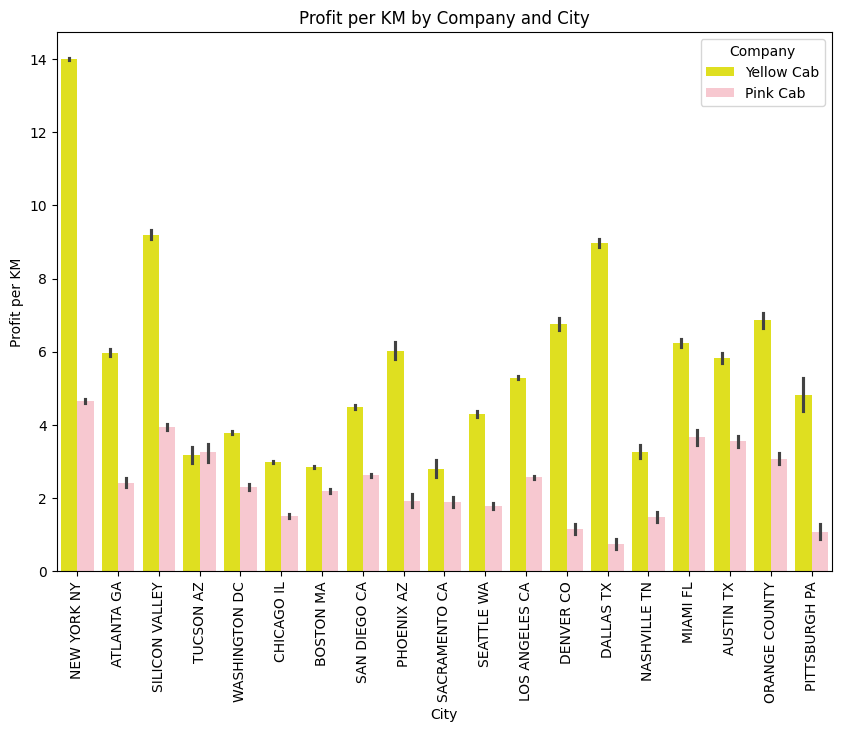

In [47]:
# Bar chart for Profit per Kilometer by Company and City
plt.figure(figsize=(10, 7))
# Rotate x-axis labels
plt.xticks(rotation=90)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='City', y='Profit per KM', hue='Company', data=df)

# Add title
plt.title('Profit per KM by Company and City')

# Show plot
plt.show()

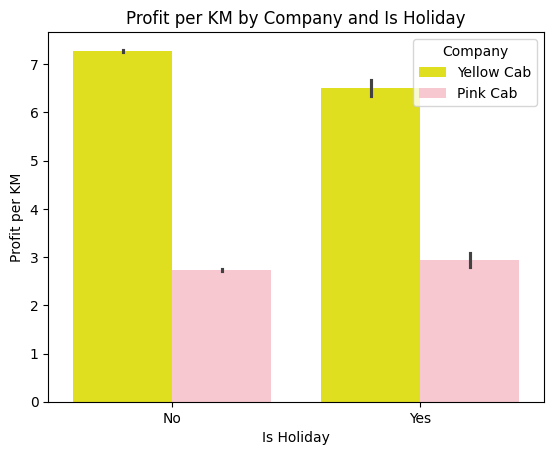

In [49]:
# Bar chart for Profit per Kilometer by Company and Is Holiday

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Is Holiday', y='Profit per KM', hue='Company', data=df)

# Add title
plt.title('Profit per KM by Company and Is Holiday')

# Show plot
plt.show()

### Cost of Trip

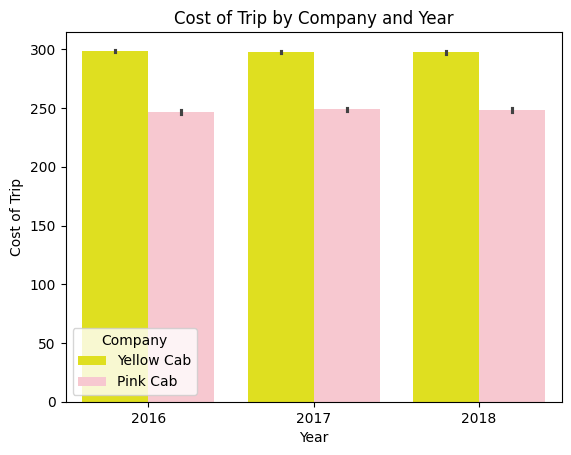

In [51]:
# Bar chart for Cost of Trip by Company and Year

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Year', y='Cost of Trip', hue='Company', data=df)

# Add title
plt.title('Cost of Trip by Company and Year')

# Show plot
plt.show()

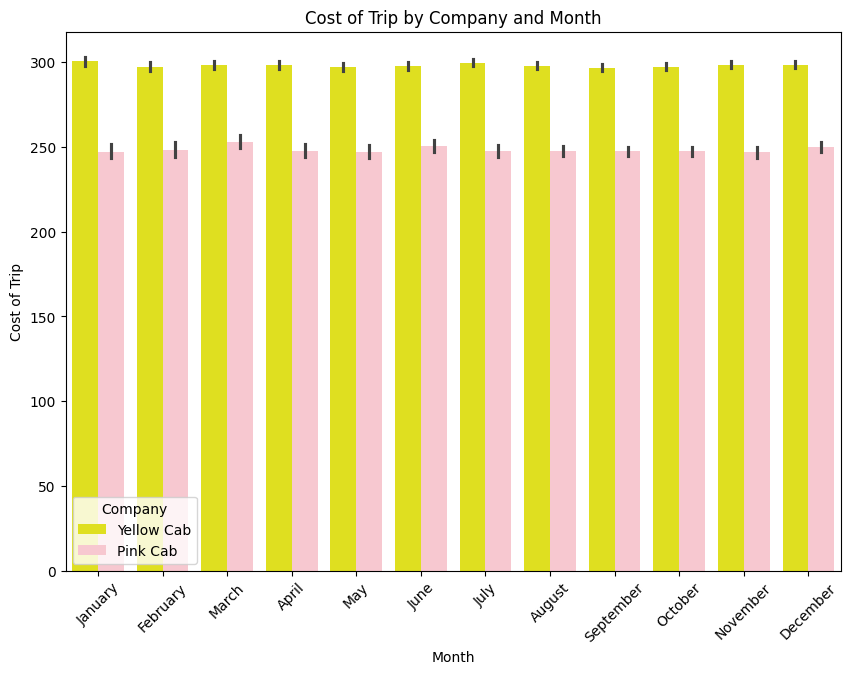

In [52]:
# Bar chart for Cost of Trip by Company and Month
plt.figure(figsize=(10, 7))
# Rotate x-axis labels
plt.xticks(rotation=45)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Month', y='Cost of Trip', hue='Company', data=df)

# Add title
plt.title('Cost of Trip by Company and Month')

# Show plot
plt.show()

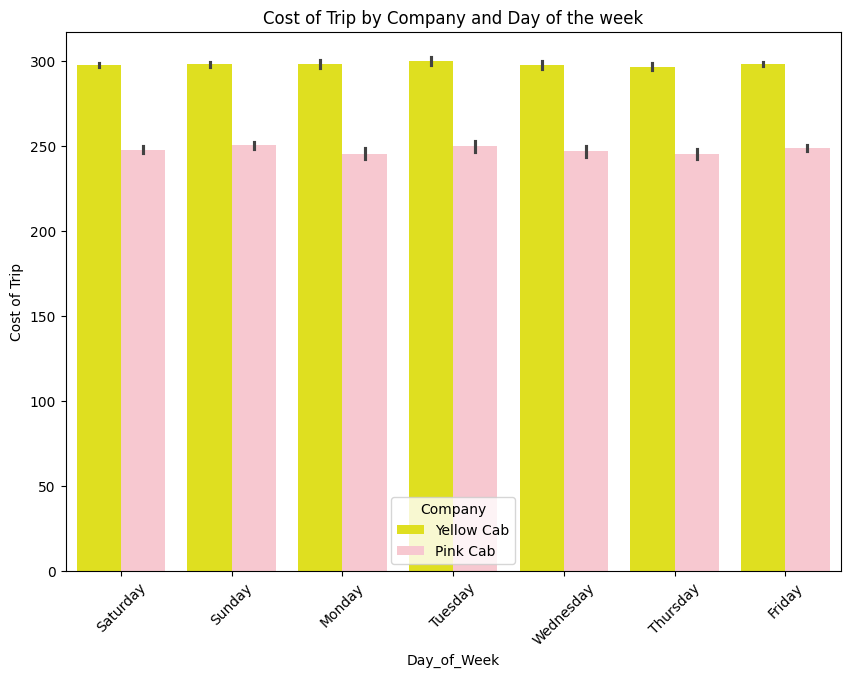

In [58]:
# Bar chart for Cost of Trip by Company and Day of the Week
plt.figure(figsize=(10, 7))
# Rotate x-axis labels
plt.xticks(rotation=45)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day_of_Week', y='Cost of Trip', hue='Company', data=df)

# Add title
plt.title('Cost of Trip by Company and Day of the week')

# Show plot
plt.show()

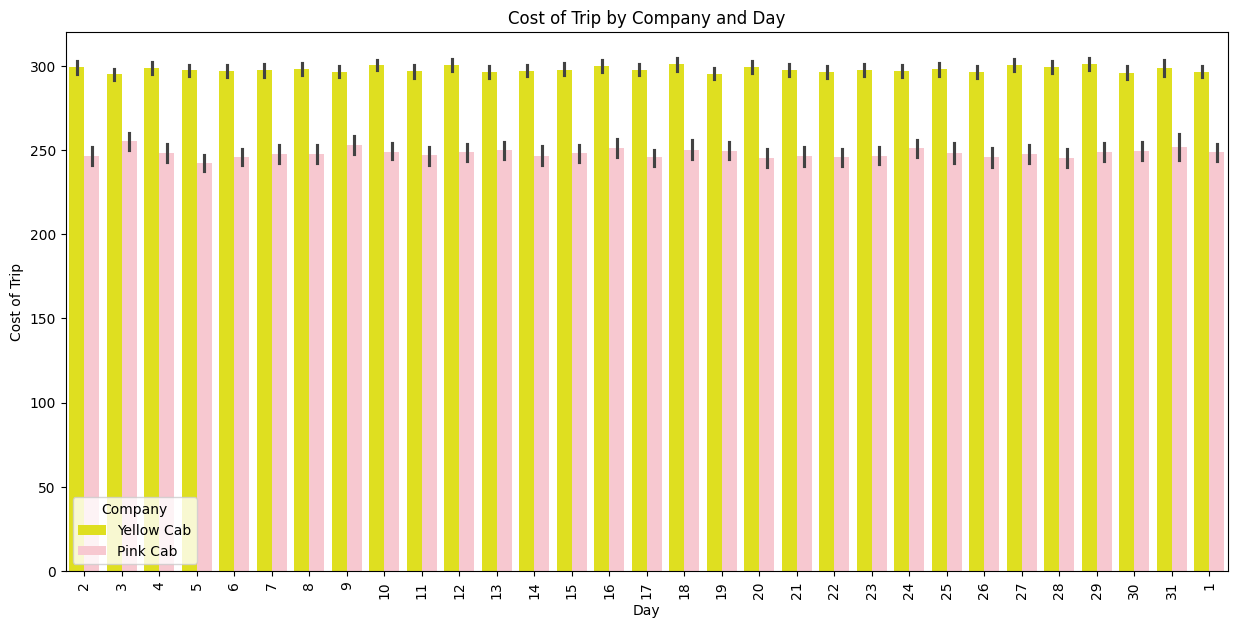

In [62]:
# Bar chart for Cost of Trip by Company and Day
plt.figure(figsize=(15, 7))

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day', y='Cost of Trip', hue='Company', data=df)

# Add title
plt.title('Cost of Trip by Company and Day')

# Show plot
plt.show()

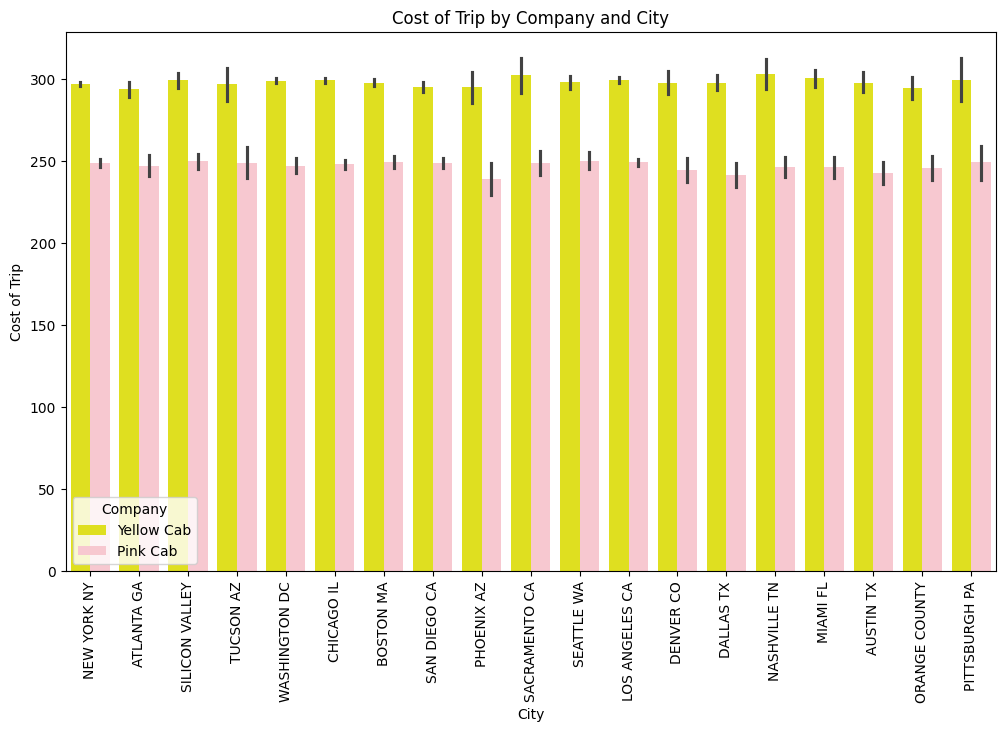

In [78]:
# Bar chart for Cost of Trip by Company and City
plt.figure(figsize=(12, 7))
# Rotate x-axis labels
plt.xticks(rotation=90)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='City', y='Cost of Trip', hue='Company', data=df)

# Add title
plt.title('Cost of Trip by Company and City')

# Show plot
plt.show()

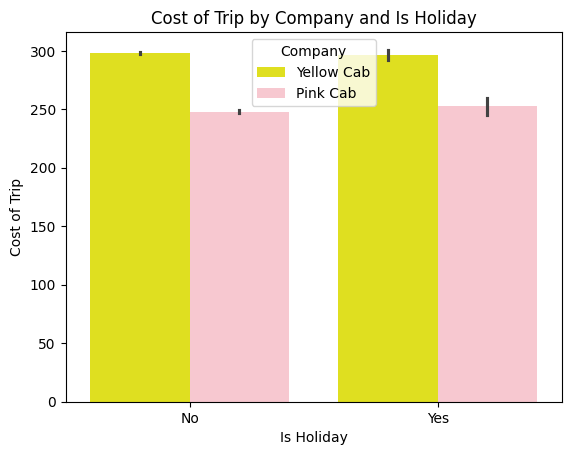

In [66]:
# Bar chart for Cost of Trip by Company and Is Holiday


# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Is Holiday', y='Cost of Trip', hue='Company', data=df)

# Add title
plt.title('Cost of Trip by Company and Is Holiday')

# Show plot
plt.show()

### Price Charged

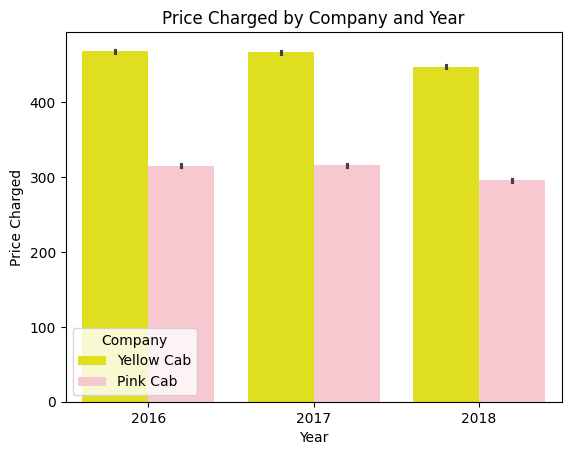

In [68]:
# Bar chart for Price Charged by Company and Year

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Year', y='Price Charged', hue='Company', data=df)

# Add title
plt.title('Price Charged by Company and Year')

# Show plot
plt.show()

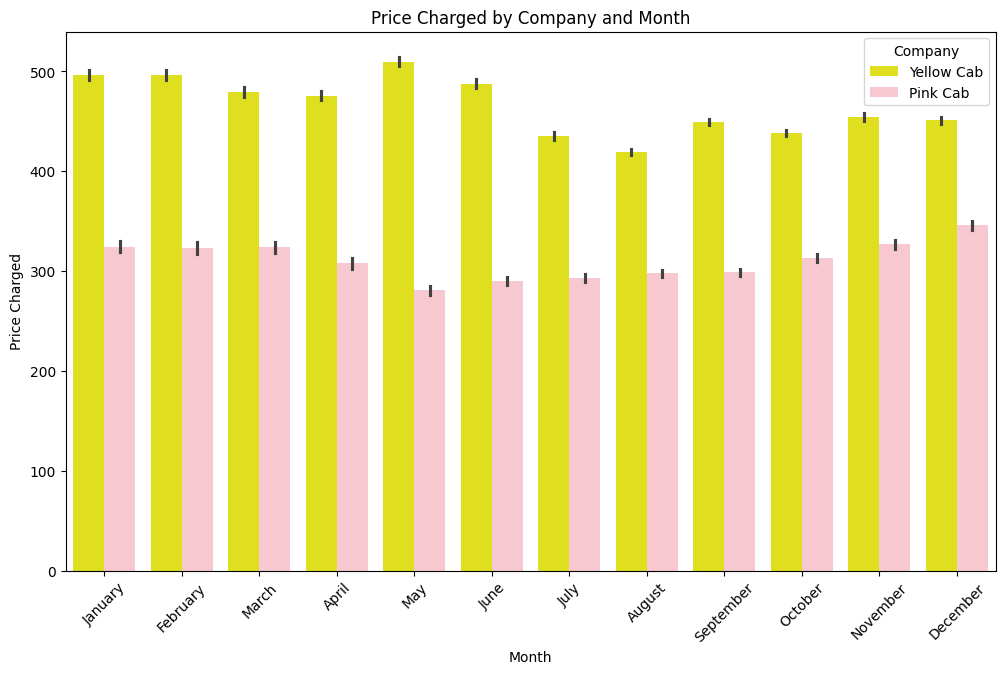

In [74]:
# Bar chart for Price Charged by Company and Month
plt.figure(figsize=(12, 7))
# Rotate x-axis labels
plt.xticks(rotation=45)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Month', y='Price Charged', hue='Company', data=df)

# Add title
plt.title('Price Charged by Company and Month')

# Show plot
plt.show()

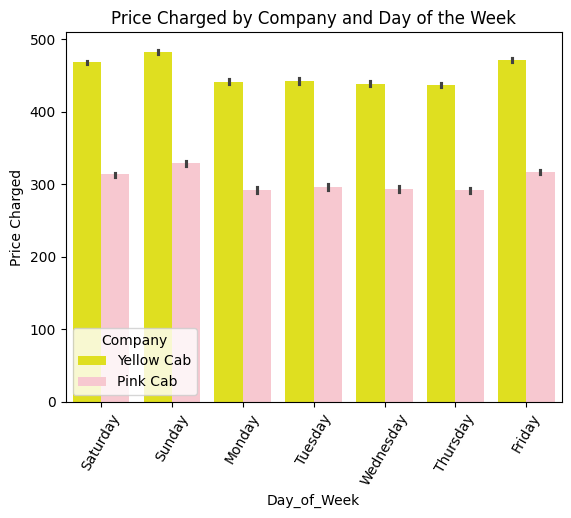

In [76]:
# Bar chart for Price Charged by Company and Day_of_Week

# Rotate x-axis labels
plt.xticks(rotation=60)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day_of_Week', y='Price Charged', hue='Company', data=df)

# Add title
plt.title('Price Charged by Company and Day of the Week')

# Show plot
plt.show()

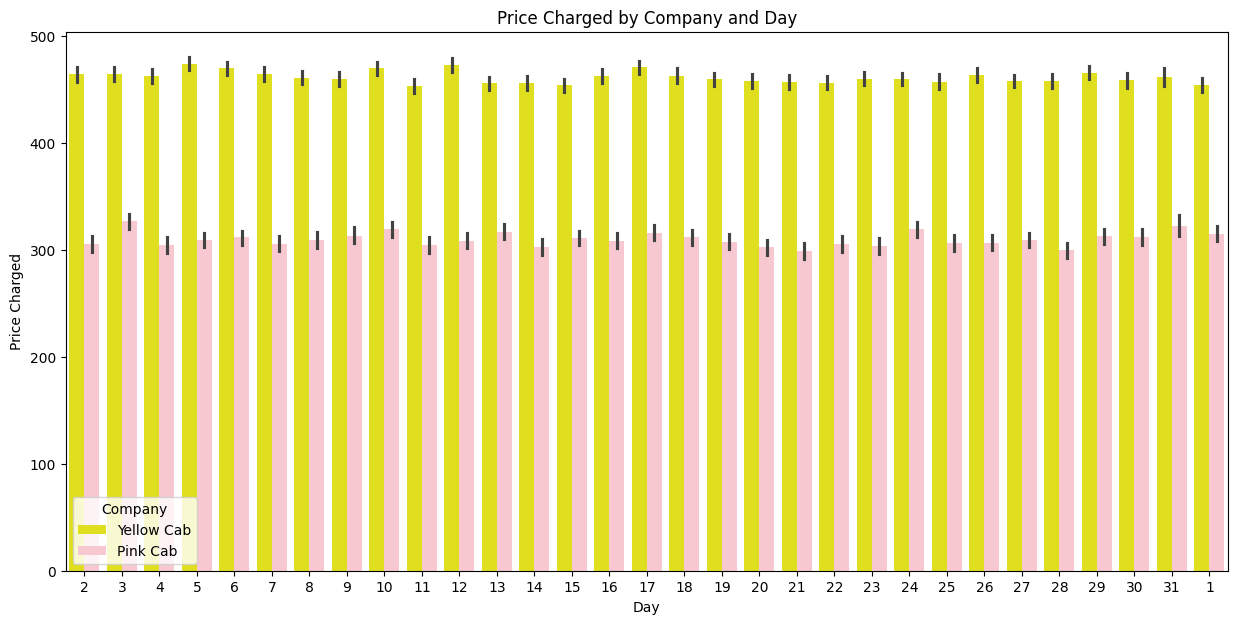

In [82]:
# Bar chart for Price Charged by Company and Day
plt.figure(figsize=(15, 7))


# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day', y='Price Charged', hue='Company', data=df)

# Add title
plt.title('Price Charged by Company and Day')

# Show plot
plt.show()

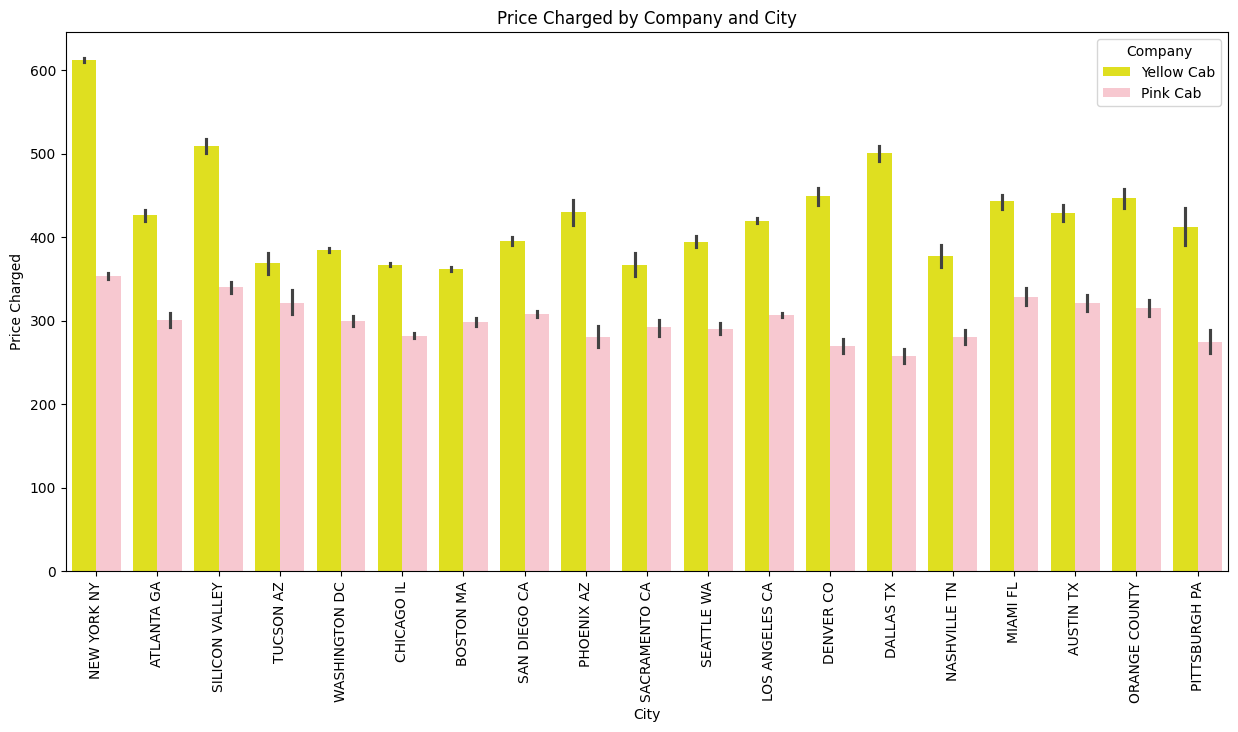

In [91]:
# Bar chart for Price Charged by Company and City
plt.figure(figsize=(15, 7))
# Rotate x-axis labels
plt.xticks(rotation=90)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='City', y='Price Charged', hue='Company', data=df)

# Add title
plt.title('Price Charged by Company and City')

# Show plot
plt.show()

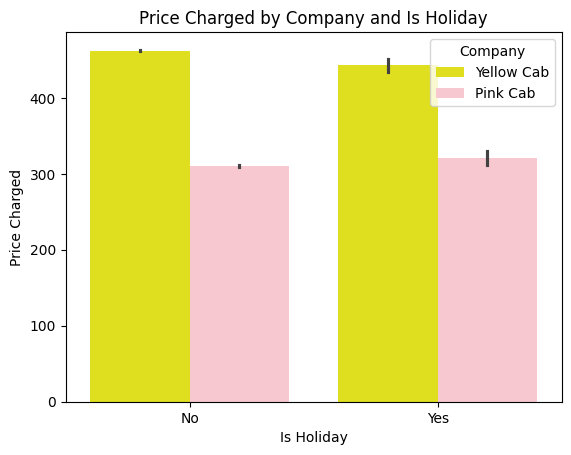

In [84]:
# Bar chart for Price Charged by Company and Is Holiday

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Is Holiday', y='Price Charged', hue='Company', data=df)

# Add title
plt.title('Price Charged by Company and Is Holiday')

# Show plot
plt.show()

### Profit made on Trip

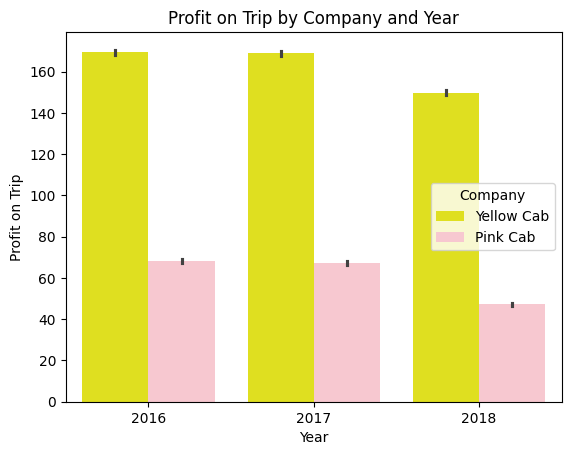

In [88]:
# Bar chart for Profit on Trip by Company and Year

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Year', y='Profit on Trip', hue='Company', data=df)

# Add title
plt.title('Profit on Trip by Company and Year')

# Show plot
plt.show()

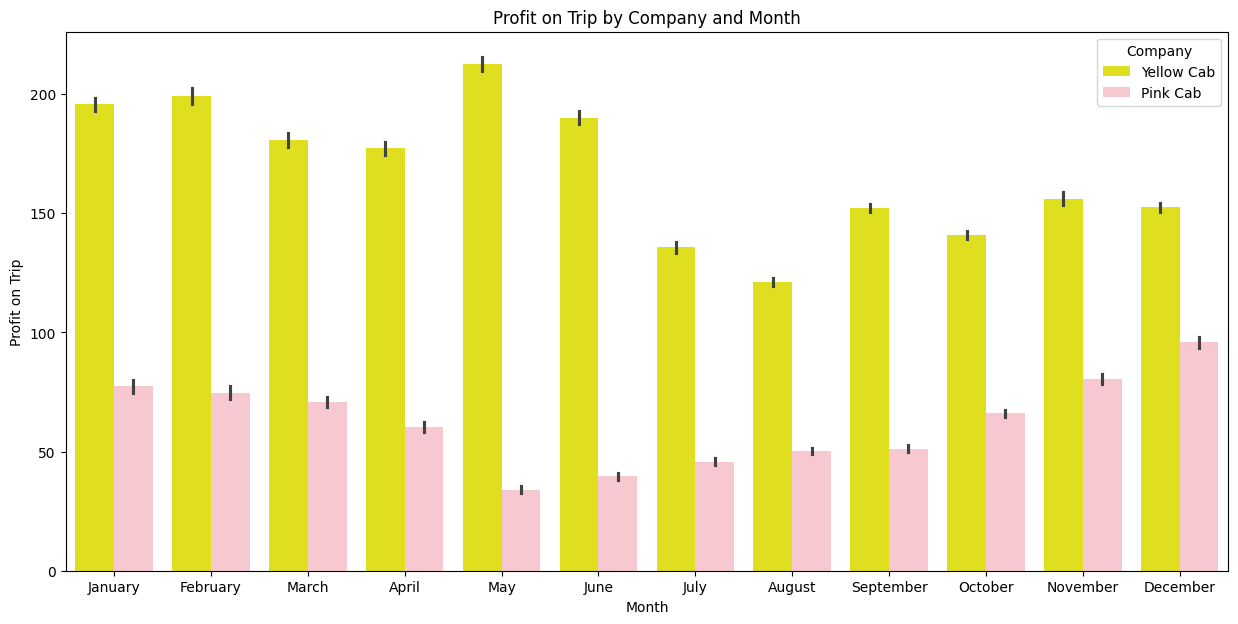

In [93]:
# Bar chart for Profit on Trip by Company and Month
plt.figure(figsize=(15, 7))


# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Month', y='Profit on Trip', hue='Company', data=df)

# Add title
plt.title('Profit on Trip by Company and Month')

# Show plot
plt.show()

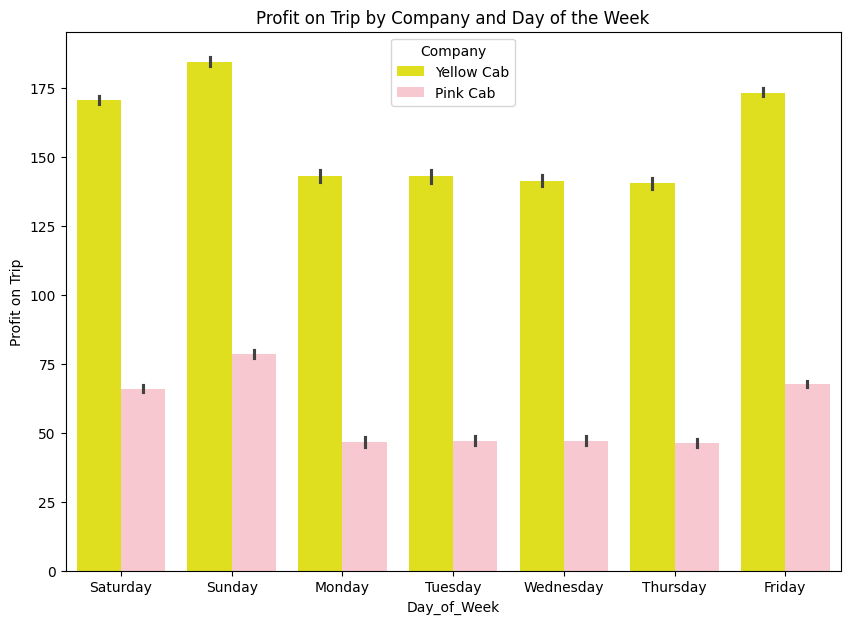

In [97]:
# Bar chart for Profit on Trip by Company and Day of the Week
plt.figure(figsize=(10, 7))


# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day_of_Week', y='Profit on Trip', hue='Company', data=df)

# Add title
plt.title('Profit on Trip by Company and Day of the Week')

# Show plot
plt.show()

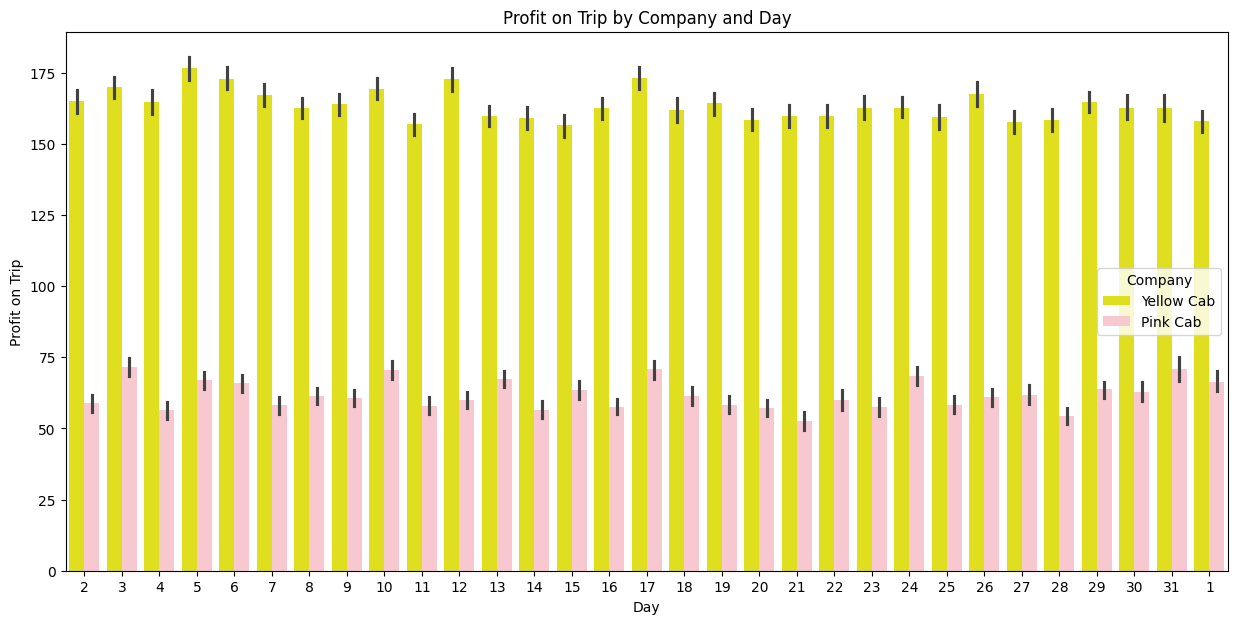

In [96]:
# Bar chart for Profit on Trip by Company and Day
plt.figure(figsize=(15, 7))


# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Day', y='Profit on Trip', hue='Company', data=df)

# Add title
plt.title('Profit on Trip by Company and Day')

# Show plot
plt.show()

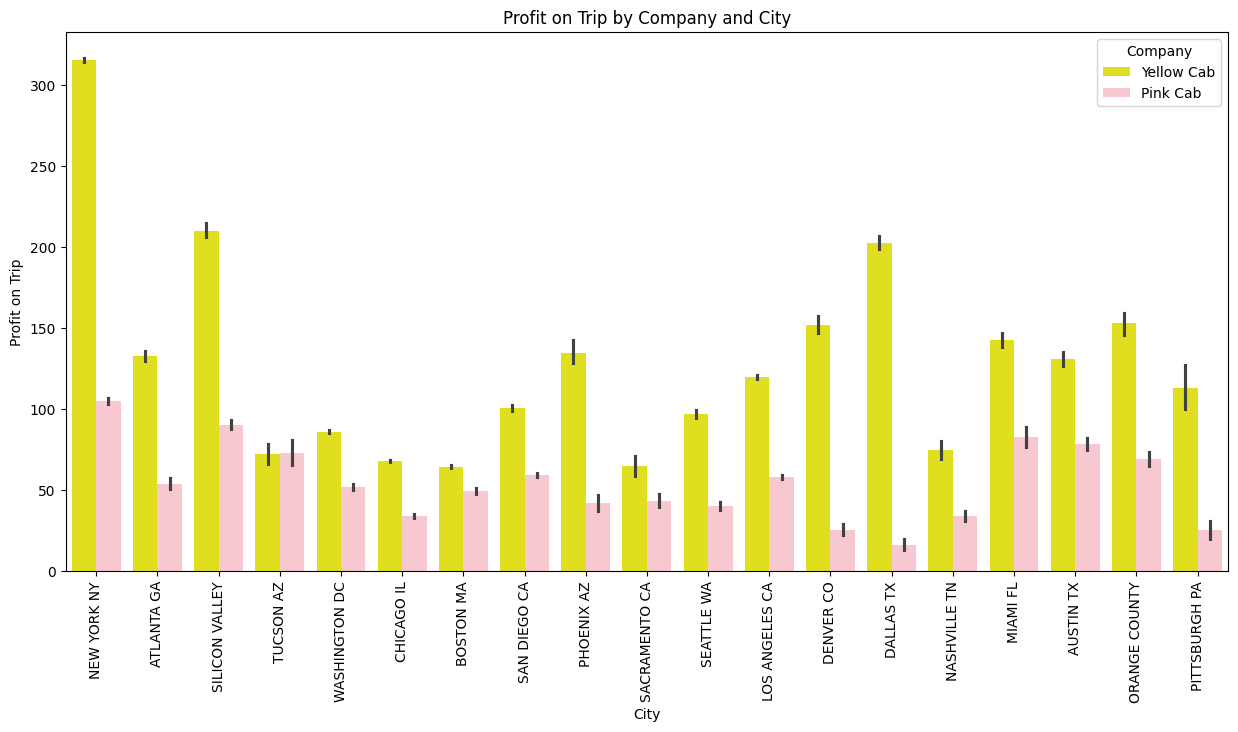

In [98]:
# Bar chart for Profit on Trip by Company and City
plt.figure(figsize=(15, 7))
# Rotate x-axis labels
plt.xticks(rotation=90)

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='City', y='Profit on Trip', hue='Company', data=df)

# Add title
plt.title('Profit on Trip by Company and City')

# Show plot
plt.show()

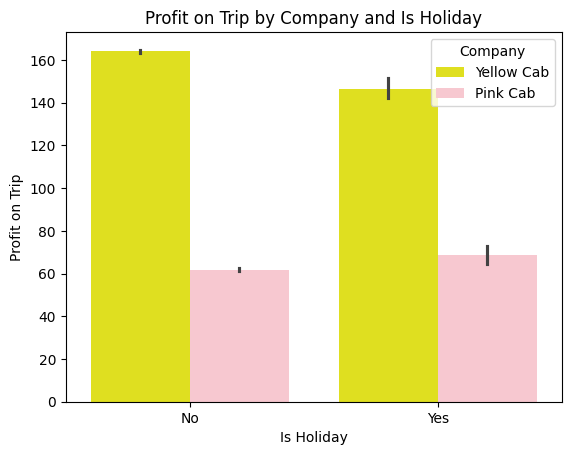

In [99]:
# Bar chart for Profit on Trip by Company and Is Holiday

# Set color palette
sns.set_palette(['yellow', 'pink'])

# Create barplot
sns.barplot(x='Is Holiday', y='Profit on Trip', hue='Company', data=df)

# Add title
plt.title('Profit on Trip by Company and Is Holiday')

# Show plot
plt.show()

# **Bi-Variate Analysis**

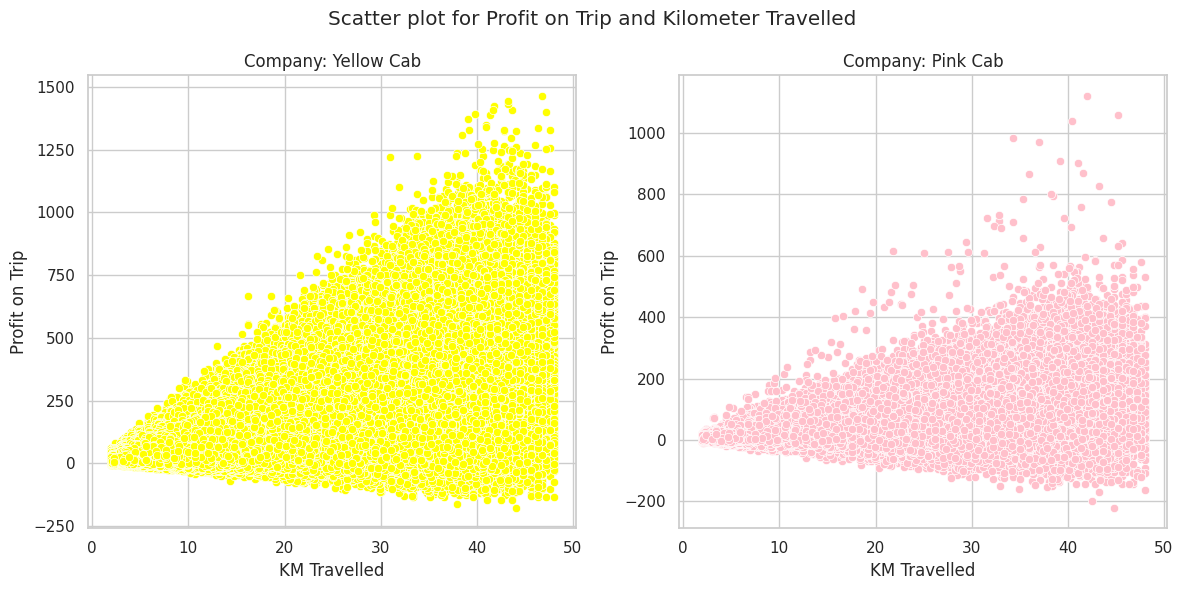

In [106]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a figure and axes with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define colors for each company
colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Scatter plot for 'Profit on Trip' and 'Kilometer Travelled' for each company
for i, company in enumerate(df['Company'].unique()):
    sns.scatterplot(data=df[df['Company'] == company], x='KM Travelled', y='Profit on Trip', ax=axes[i], color=colors[company])
    axes[i].set_title(f"Company: {company}")

# Set common title for the whole subplot
fig.suptitle('Scatter plot for Profit on Trip and Kilometer Travelled')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

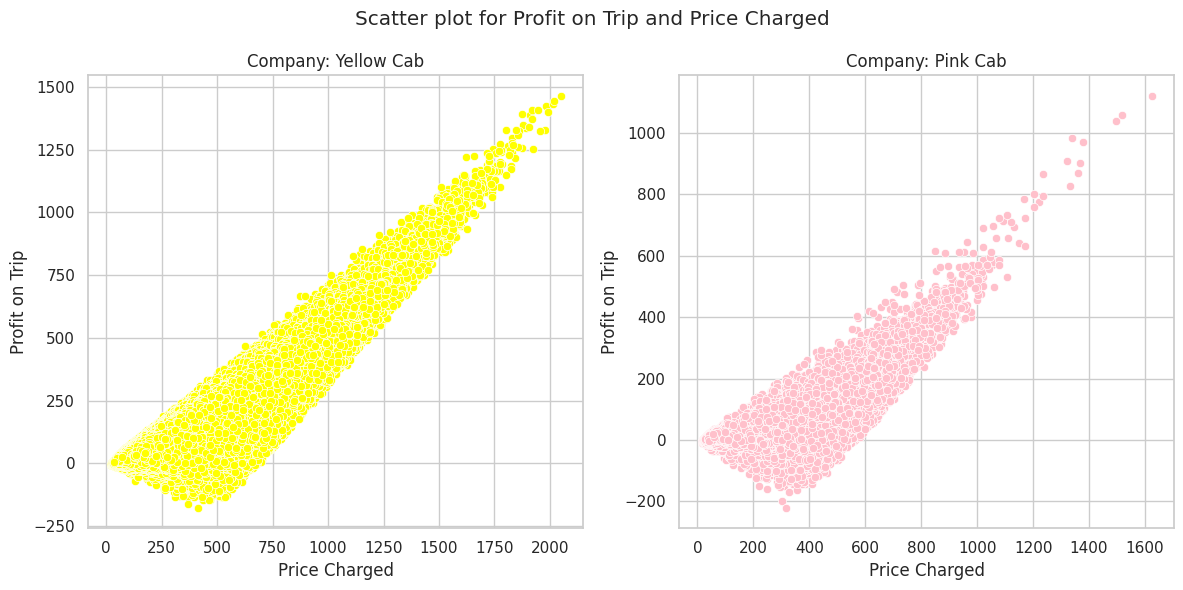

In [108]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a figure and axes with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define colors for each company
colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Scatter plot for 'Profit on Trip' and 'Price Charged' for each company
for i, company in enumerate(df['Company'].unique()):
    sns.scatterplot(data=df[df['Company'] == company], x='Price Charged', y='Profit on Trip', ax=axes[i], color=colors[company])
    axes[i].set_title(f"Company: {company}")

# Set common title for the whole subplot
fig.suptitle('Scatter plot for Profit on Trip and Price Charged')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

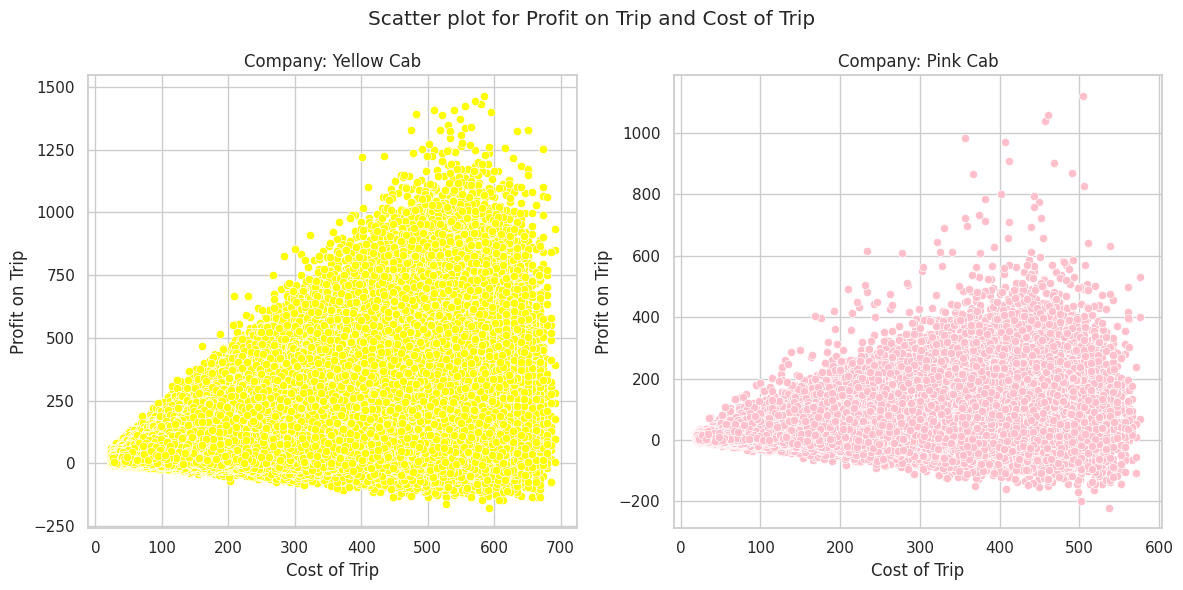

In [109]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a figure and axes with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define colors for each company
colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Scatter plot for 'Profit on Trip' and 'Cost of Trip' for each company
for i, company in enumerate(df['Company'].unique()):
    sns.scatterplot(data=df[df['Company'] == company], x='Cost of Trip', y='Profit on Trip', ax=axes[i], color=colors[company])
    axes[i].set_title(f"Company: {company}")

# Set common title for the whole subplot
fig.suptitle('Scatter plot for Profit on Trip and Cost of Trip')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

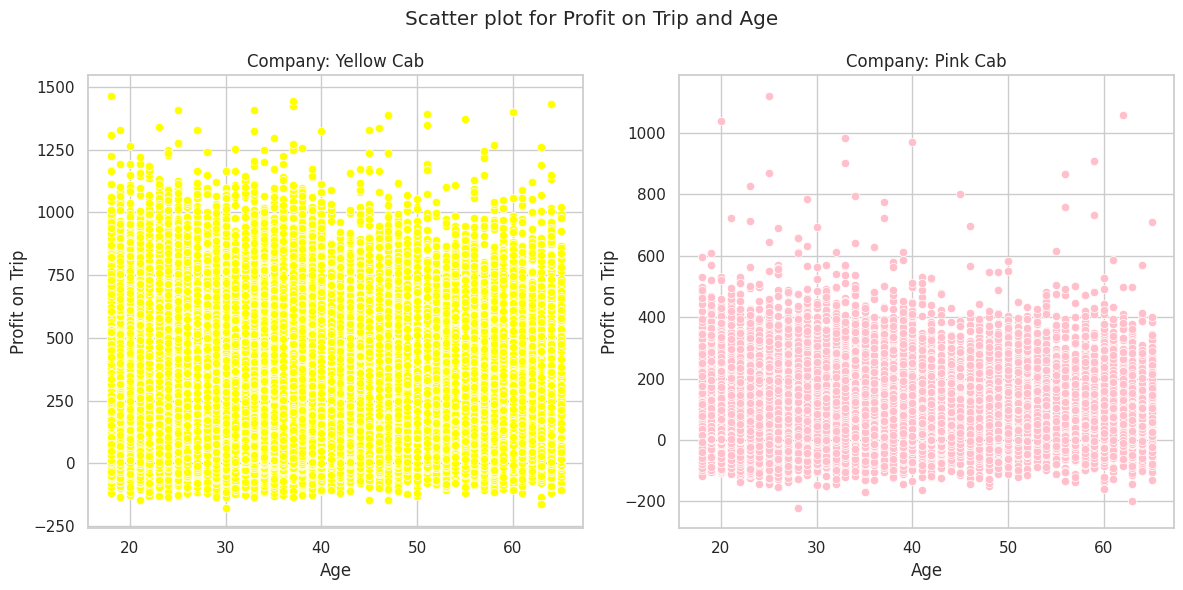

In [110]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a figure and axes with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define colors for each company
colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Scatter plot for 'Profit on Trip' and 'Age' for each company
for i, company in enumerate(df['Company'].unique()):
    sns.scatterplot(data=df[df['Company'] == company], x='Age', y='Profit on Trip', ax=axes[i], color=colors[company])
    axes[i].set_title(f"Company: {company}")

# Set common title for the whole subplot
fig.suptitle('Scatter plot for Profit on Trip and Age')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# **Hypothesis Testing**

In [112]:
Pink_Cab_df = df.loc[df['Company'] == 'Pink Cab']
Yellow_Cab_df = df.loc[df['Company']=='Yellow Cab']

# Columns to be tested
columns = ['KM Travelled', 'Cost of Trip', 'Price Charged', 'Profit per KM', 'Profit on Trip', 'Income (USD/Month)', 'Age']

## Test of Assumptions

### Parametric Test
**Assumptions**

* Random
* Independent
* Normal
* Equal Variance

QQ Plot and Shapiro-Wilk for Test of Normality

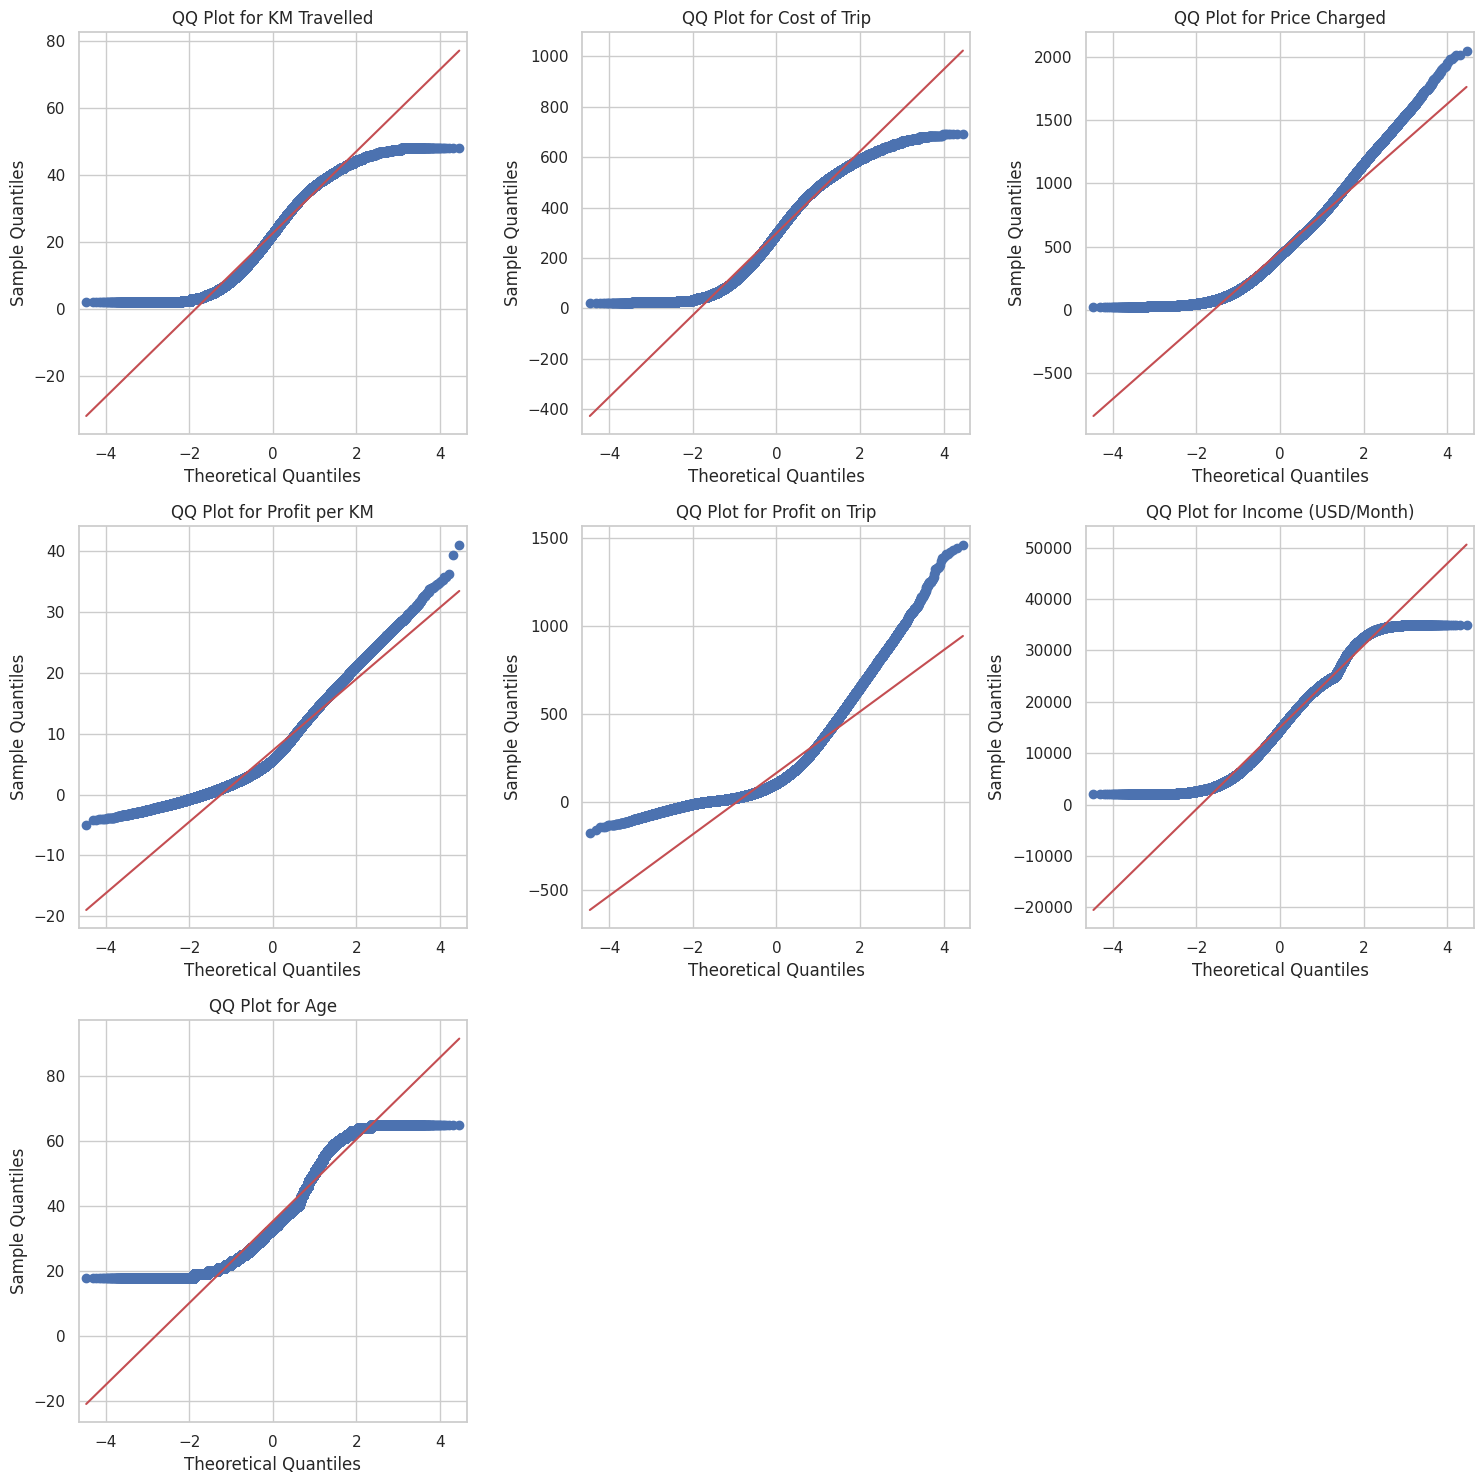

In [127]:
# Set seaborn style
sns.set(style="whitegrid")


# Create a figure and axes with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))


# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column and create QQ plot
for i, column in enumerate(columns):
    # QQ Plot for the column
    sm.qqplot(Yellow_Cab_df[column], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot for {column}')

# Hide empty subplots if there are fewer columns than subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()



# Show plot
plt.show()


In [125]:
# Shapiro-Walk test for normality

# Iterate over each column and conduct Shapiro-Wilk test
for column in columns:
    _, p_value = shapiro(Yellow_Cab_df[column])
    if p_value >= 0.05:
      print(f'{column} is normally distributed');
    else:
      print(f'{column} did not meet normality test.')


KM Travelled did not meet normality test.
Cost of Trip did not meet normality test.
Price Charged did not meet normality test.
Profit per KM did not meet normality test.
Profit on Trip did not meet normality test.
Income (USD/Month) did not meet normality test.
Age did not meet normality test.


Pink Cab Test for Normality

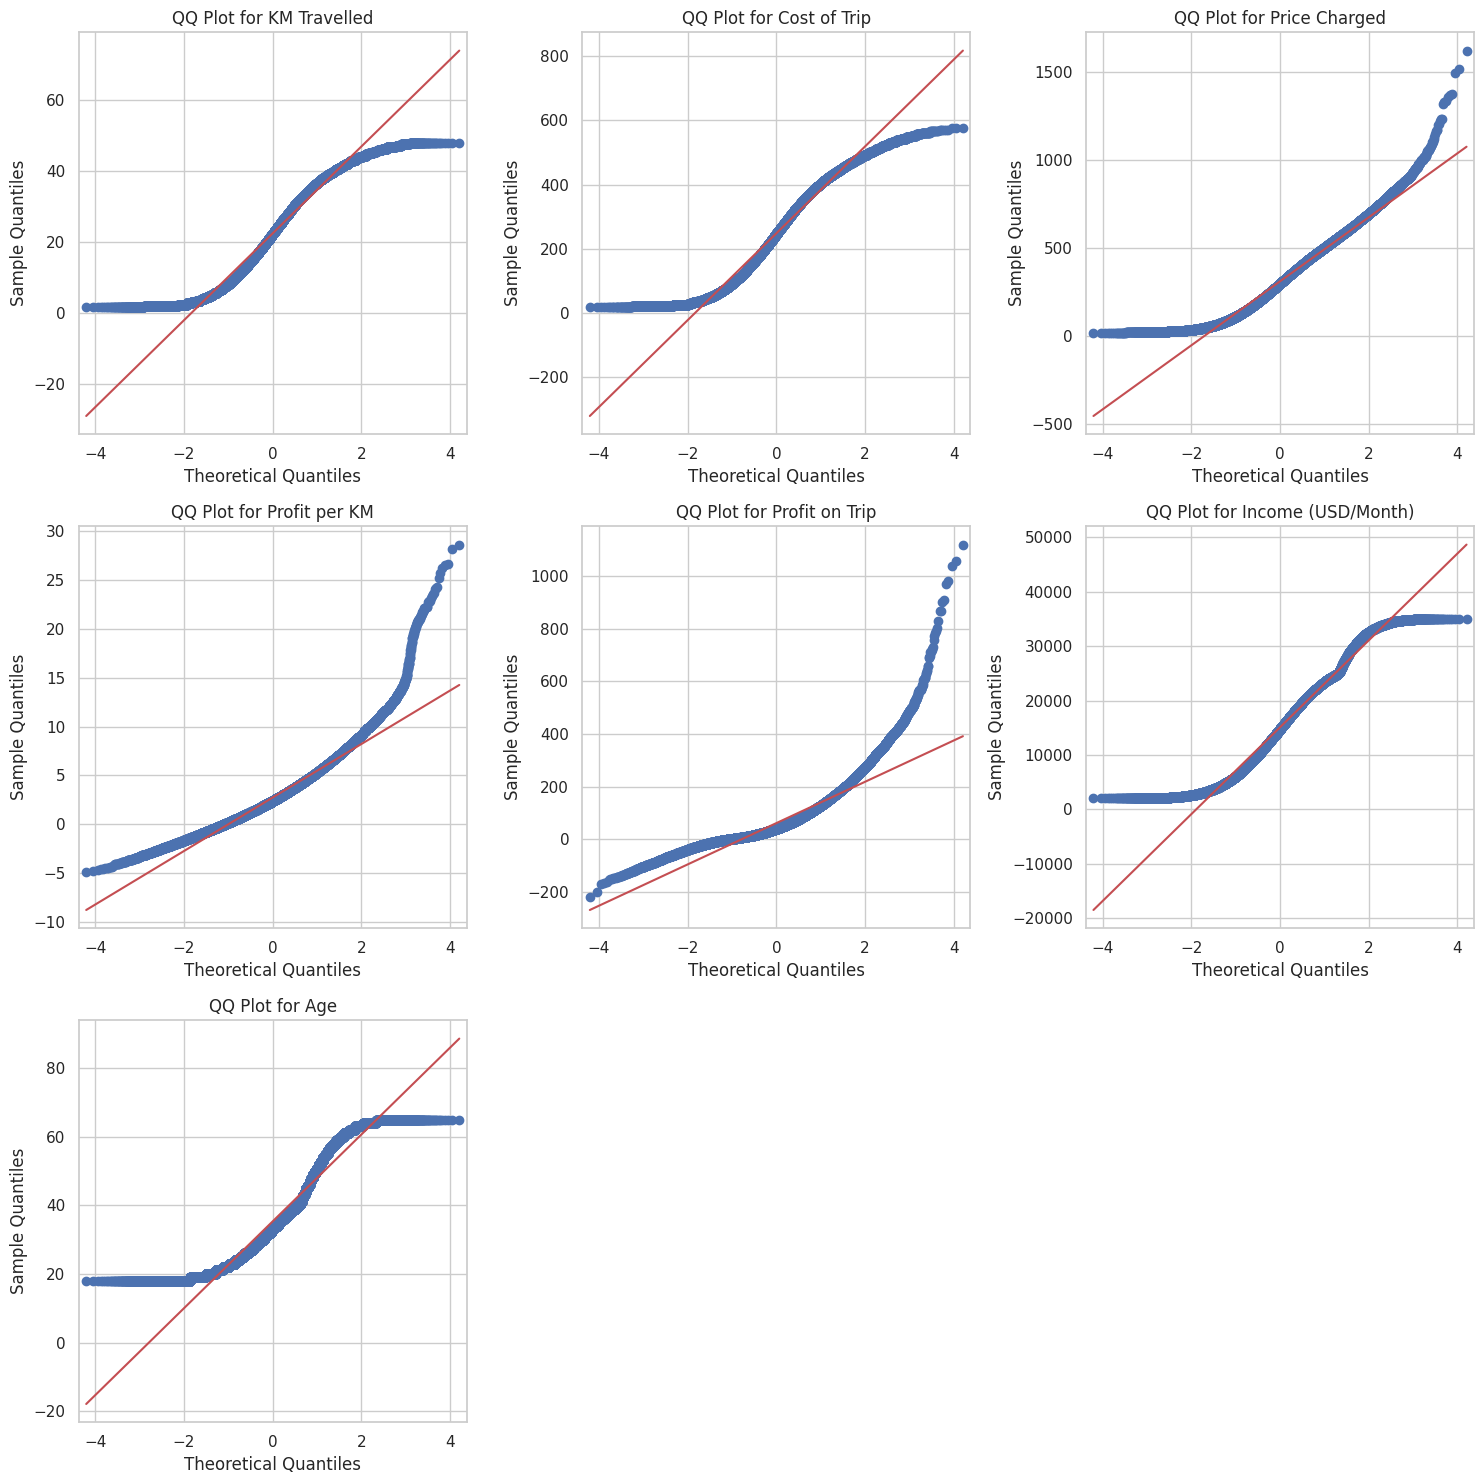

In [128]:
# Create a figure and axes with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column and create QQ plot
for i, column in enumerate(columns):
    # QQ Plot for the column with pink color
    sm.qqplot(Pink_Cab_df[column], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot for {column}')

# Hide empty subplots if there are fewer columns than subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [142]:
# Shapiro-Walk test for normality

# Iterate over each column and conduct Shapiro-Wilk test
for column in columns:
    _, p_value = shapiro(Pink_Cab_df[column])
    if p_value >= 0.05:
      print(f'{column} is normally distributed(p_value = {p_value:.2f})');
    else:
      print(f'{column} did not meet normality test(p_value = {p_value:.2f})')


KM Travelled did not meet normality test(p_value = 0.00)
Cost of Trip did not meet normality test(p_value = 0.00)
Price Charged did not meet normality test(p_value = 0.00)
Profit per KM did not meet normality test(p_value = 0.00)
Profit on Trip did not meet normality test(p_value = 0.00)
Income (USD/Month) did not meet normality test(p_value = 0.00)
Age did not meet normality test(p_value = 0.00)


Levene's Test for Homogeneity of Variance

Yellow Cab and Pink Cab Test for Equal Variance

In [141]:
# Perform Levene's test for each column in Yellow Cab and Pink Cab DataFrames
for column in columns:
    statistic, p_value = levene(Yellow_Cab_df[column], Pink_Cab_df[column])
    if p_value >= 0.05:
      print(f'Yellow Cab and Pink Cab {column} has equal variance(p_value = {p_value:.2f})');
    else:
      print(f'Yellow Cab and Pink Cab {column} has unequal variance(p_value = {p_value:.2f})');

Yellow Cab and Pink Cab KM Travelled has equal variance(p_value = 0.50)
Yellow Cab and Pink Cab Cost of Trip has unequal variance(p_value = 0.00)
Yellow Cab and Pink Cab Price Charged has unequal variance(p_value = 0.00)
Yellow Cab and Pink Cab Profit per KM has unequal variance(p_value = 0.00)
Yellow Cab and Pink Cab Profit on Trip has unequal variance(p_value = 0.00)
Yellow Cab and Pink Cab Income (USD/Month) has equal variance(p_value = 0.12)
Yellow Cab and Pink Cab Age has unequal variance(p_value = 0.03)


Conditions for Parametric Test was not met.

### Non-Parametric Test
**Assumptions**

* Random
* Independent
* Distributions have the same shape


From the Univariate Analysis(Distribution of Numerical Columns) above, we observed that all distribution has the same shape. Hence, all conditions for Non-parametric(Mann-Whitney U Test) are met.

In [140]:
# Perform Mann-Whitney U test for each column in There is no significant difference between Yellow Cab and Pink Cab DataFrames
for column in columns:
    statistic, p_value = mannwhitneyu(Yellow_Cab_df[column], Pink_Cab_df[column])
    if p_value >= 0.05:
      print(f'There is no significant difference(p_value = {p_value:.4f}) between Yellow Cab and Pink Cab {column}');
    else:
      print(f'There is a significant difference(p_value = {p_value:.4f}) between Yellow Cab and Pink Cab {column}');

There is no significant difference(p_value = 0.7868) between Yellow Cab and Pink Cab KM Travelled
There is a significant difference(p_value = 0.0000) between Yellow Cab and Pink Cab Cost of Trip
There is a significant difference(p_value = 0.0000) between Yellow Cab and Pink Cab Price Charged
There is a significant difference(p_value = 0.0000) between Yellow Cab and Pink Cab Profit per KM
There is a significant difference(p_value = 0.0000) between Yellow Cab and Pink Cab Profit on Trip
There is no significant difference(p_value = 0.4027) between Yellow Cab and Pink Cab Income (USD/Month)
There is no significant difference(p_value = 0.4692) between Yellow Cab and Pink Cab Age


Hence, we can conclude that the differences observed in Cost of Trip, Price Charged, Profit per KM, and Profit on Trip between Yellow Cab and Pink Cab from the analysis above are significant and the differences observed in KM Travelled, Income (USD/Month) and Age are not significant.